# Covariant cylindrical vector transformed to cartesian

We will in this notebook transfor a covariant cylindrical vector to cartesian coordinates.

A covariant vector transforms as

$$
(A')_i=\frac{\partial x^j}{\partial (x')^i}A_j
$$

where the prime $'$ refers to quantities with in the new coordinate system.

In [6]:
from collections import OrderedDict
from sympy import init_printing
from sympy import symbols, simplify, solve
from sympy import Eq
from sympy import exp, sqrt, atan, cos, sin
import re
from IPython.display import display

init_printing()

In [7]:
rho = symbols('rho', positive = True)
theta, z = symbols('theta, z', real = True)
x, y, z = symbols('x, y, z', real = True)
A_rho, A_theta, A_z = symbols('A_rho, A_theta, A_z', real = True)
cylSymb = [rho, theta, z]
A_Symb = [A_rho, A_theta, A_z]

The transform

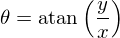

In [8]:
cylToCart = OrderedDict([(rho,sqrt(x**2+y**2)),
                         (theta, atan(y/x)),
                         (z, 1*z)])

for coord in cylToCart.keys():
    display(Eq(coord,cylToCart[coord]))
    

The inverse transform

In [9]:
cartToCyl = OrderedDict([(x, rho*cos(theta)),
                         (y, rho*sin(theta)),
                         (z, z)])

for coord in cartToCyl.keys():
    display(Eq(coord,cartToCyl[coord]))

Covariant components written in cylindrical coordinates

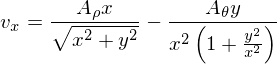

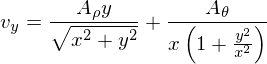

In [10]:
cartTemplateCyl = OrderedDict.fromkeys(cartToCyl)
for coord in cartTemplateCyl.keys():
    cartTemplateCyl[coord]  = 0
    for cart, A in zip(cylSymb, A_Symb):
        cartTemplateCyl[coord]  += A*cylToCart[cart].diff(coord)
    display(Eq(symbols('v_'+str(coord)), cartTemplateCyl[coord]))